In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import seaborn as sns

In [63]:
#Carrgeando a base de dados
df = pd.read_csv('C:\\Users\\rafae\\OneDrive\\Documentos\\GameRelease\\GR.csv')

In [64]:
#Convertendo a coluna 'release' para o formato de data
df['release'] = pd.to_datetime(df['release'], format='%b %d %Y')
print(df['release'])

0       2023-01-26
1       2023-03-24
2       2023-03-31
3       2023-03-28
4       2023-01-25
           ...    
66422   2006-10-16
66423   2006-07-26
66424   2006-12-19
66425   2006-10-25
66426   2006-10-05
Name: release, Length: 66427, dtype: datetime64[ns]


In [65]:
#Ordenando o DataFrame pela coluna 'release'
df_sorted = df.sort_values('release')

#Filtrando o DataFrame para selecionar apenas os primeiros 10000 valores
df_cut = df_sorted.head(10000)

In [66]:
#Removendo as vírgulas dos valores na coluna 'positive_reviews'
df['positive_reviews'] = df['positive_reviews'].str.replace(',', '')

#Removendo as vírgulas dos valores na coluna 'negative_reviews'
df['negative_reviews'] = df['negative_reviews'].str.replace(',', '')

#Convertendo as colunas para inteiros
df['positive_reviews'] = df['positive_reviews'].astype(int)
df['negative_reviews'] = df['negative_reviews'].astype(int)

#Verificando o novo tipo de dados das colunas
print(df.dtypes)

Unnamed: 0                   int64
game                        object
link                        object
release             datetime64[ns]
peak_players                object
positive_reviews             int32
negative_reviews             int32
total_reviews               object
rating                      object
dtype: object


In [67]:
#Calculando a soma das linhas das colunas 'positive_reviews' e 'negative_reviews'
df['total_reviews'] = df['positive_reviews'] + df['negative_reviews']

#Verificando o DataFrame com a nova coluna 'total_reviews'
print(df)

       Unnamed: 0                              game           link    release  \
0               0                       Pizza Tower  /app/2231450/ 2023-01-26   
1               1                   Resident Evil 4  /app/2050650/ 2023-03-24   
2               2  The Murder of Sonic the Hedgehog  /app/2324650/ 2023-03-31   
3               3                Pineapple on pizza  /app/2263010/ 2023-03-28   
4               4                        Hi-Fi RUSH  /app/1817230/ 2023-01-25   
...           ...                               ...            ...        ...   
66422       66422                   Space Empires V     /app/1690/ 2006-10-16   
66423       66423  Iron Warriors: T-72 Tank Command     /app/1670/ 2006-07-26   
66424       66424          Gumboy: Crazy Adventures     /app/2520/ 2006-12-19   
66425       66425                   Shattered Union     /app/3960/ 2006-10-25   
66426       66426               Poker Superstars II     /app/4100/ 2006-10-05   

      peak_players  positiv

In [73]:
#Convertendo as colunas para numéricas
df_cut['peak_players'] = pd.to_numeric(df_cut['peak_players'], errors='coerce')
df_cut['positive_reviews'] = pd.to_numeric(df_cut['positive_reviews'], errors='coerce')
df_cut['negative_reviews'] = pd.to_numeric(df_cut['negative_reviews'], errors='coerce')
df_cut['total_reviews'] = pd.to_numeric(df_cut['total_reviews'], errors='coerce')
df_cut['rating'] = pd.to_numeric(df_cut['rating'], errors='coerce')

print(df['peak_players'].dtypes)

object


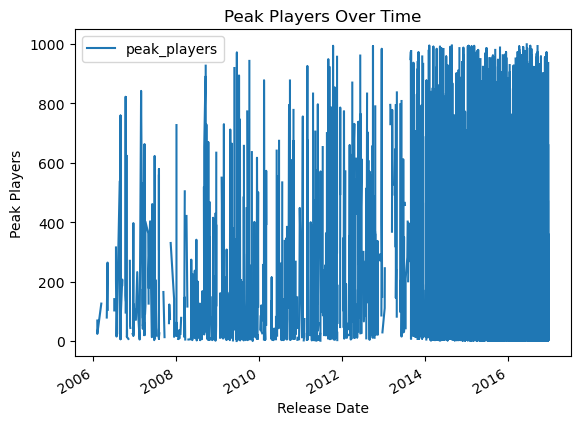

In [74]:
#Convertendo as colunas para numéricas
df_cut = df_cut.copy()
df_cut['peak_players'] = pd.to_numeric(df_cut['peak_players'], errors='coerce')
df_cut['positive_reviews'] = pd.to_numeric(df_cut['positive_reviews'], errors='coerce')
df_cut['negative_reviews'] = pd.to_numeric(df_cut['negative_reviews'], errors='coerce')
df_cut['total_reviews'] = pd.to_numeric(df_cut['total_reviews'], errors='coerce')
df_cut['rating'] = pd.to_numeric(df_cut['rating'], errors='coerce')

#Ordenando o DataFrame pela coluna 'release'
df_cut = df_cut.sort_values('release')

#Plotando o gráfico de linha
df_cut.plot(x='release', y='peak_players', kind='line')

plt.title('Peak Players Over Time')
plt.xlabel('Release Date')
plt.ylabel('Peak Players')
plt.show()

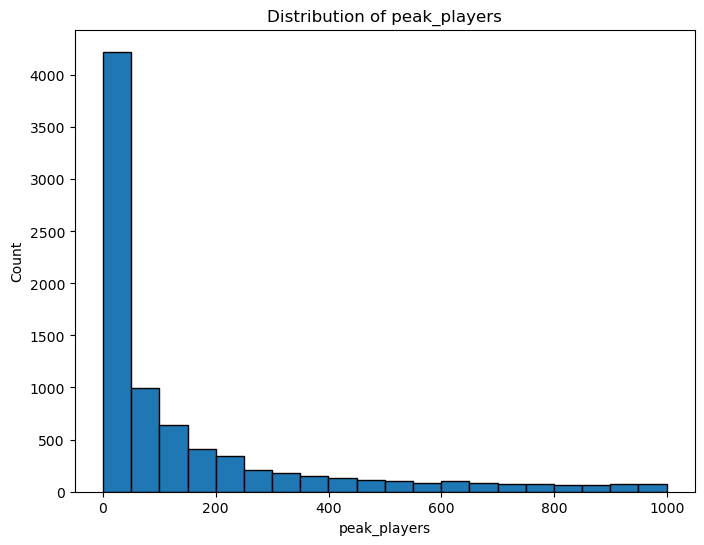

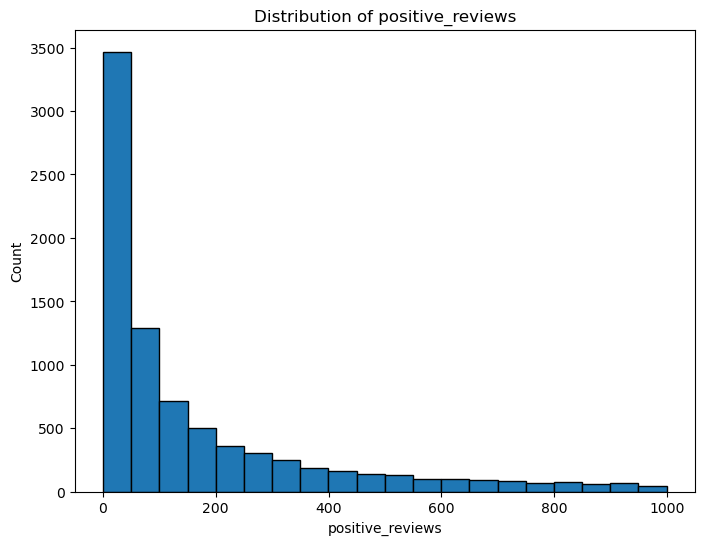

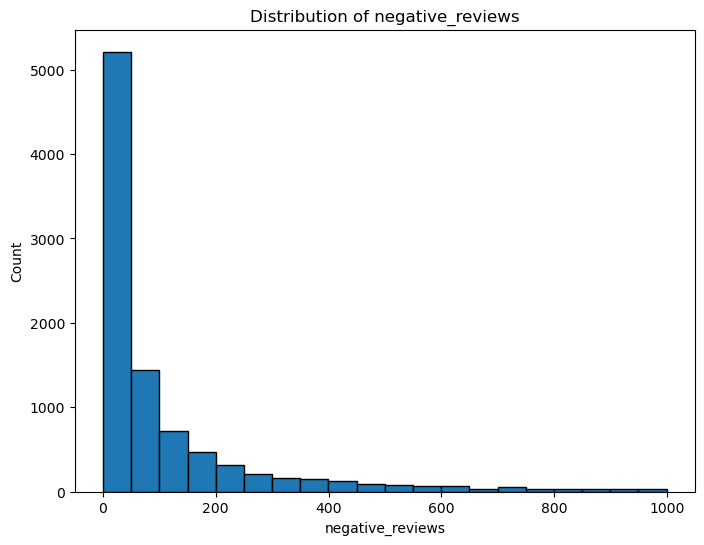

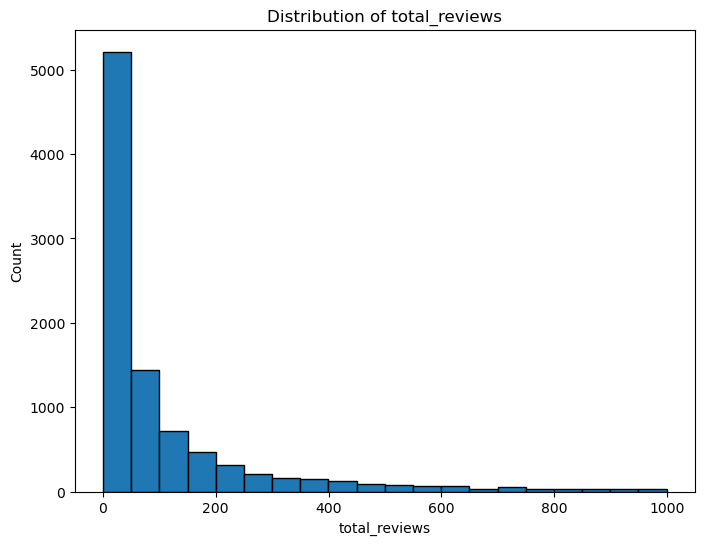

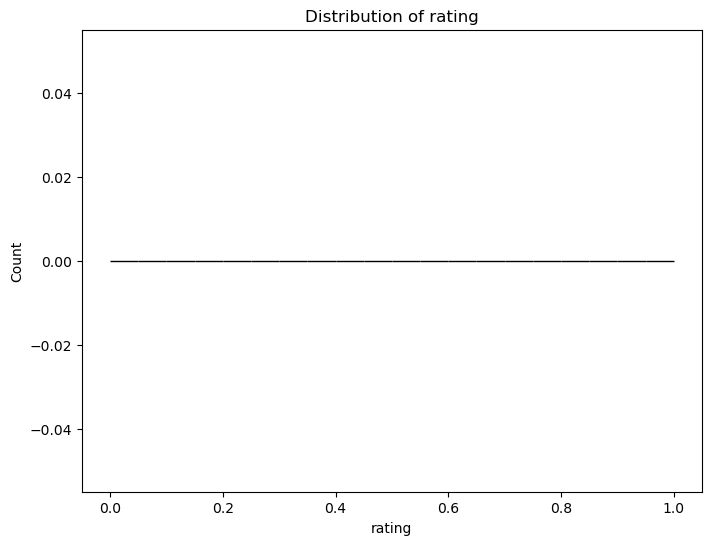

In [75]:
#Listando as colunas que serão plotadas
columns = ['peak_players', 'positive_reviews', 'negative_reviews', 'total_reviews', 'rating']

for col in columns:
plt.figure(figsize=(8, 6))
     
sns.histplot(df_cut[col], kde=True, bins=20)
plt.title(f'Distribution of {col}')
plt.xlabel(f'{col}')
plt.ylabel('Count')
plt.show()
